<a href="https://colab.research.google.com/github/mtgr18977/python_notebooks/blob/main/Regressao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Primeira coisa a ser feita é criar uma variável independente (x) e uma dependente (y) e usar o NumPY para gerar ruído para essa variável.

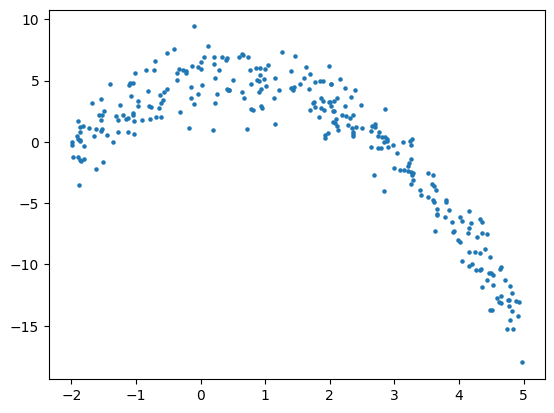

In [ ]:
def f(x):
  mu, sigma = 0, 1.5
  return -x**2 + x + 5 + np.random.normal(mu, sigma, 1)

num_points = 300
np.random.seed(1)

x = np.random.uniform(-2, 5, num_points)
y = np.array([f(i) for i in x])

plt.scatter(x,y, s = 5)

Numa regressão, prevemos os dados numéricos criando uma árvore com multiplos nós e cada nó de treino acaba em outro nó.

Dado um certo valor de entrada de dados, o valor de entrada deve chegar em um nó. Todos os valores de X alcançam um nó M que é um subconjunto de X. Matematicamente falando, daremos um valor de 1 quando um nó alcançar o nó M e um valor de 0 quando não alcançar.

O ponto de partida se dará ao iterar os dados categorizados de treino escolhendo 2 nós consecutivos em cada passo e depois calculando a sua média. A média calculada é o limite onde iremos dividir o conjunto de dados em dois.

Tomemos um limite aleatório para uma situação genérica:

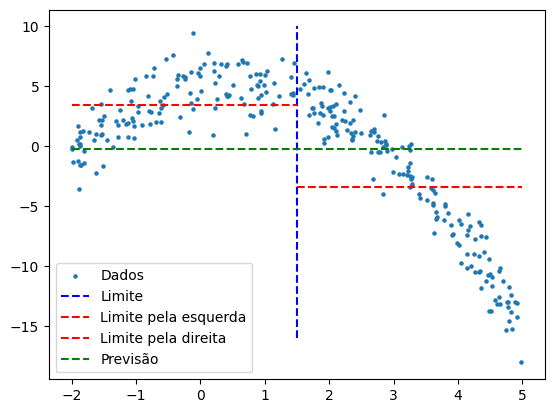

In [ ]:
limite = 1.5

menor = np.take(y, np.where(x < limite))
maior = np.take(y, np.where(x > limite))

plt.scatter(x,y, s = 5, label = "Dados")
plt.plot([limite]*2, [-16, 10], 'b--', label = "Limite")
plt.plot([-2, limite], [menor.mean()]*2, 'r--', label = "Limite pela esquerda")
plt.plot([limite, 5], [maior.mean()]*2, 'r--', label = "Limite pela direita")
plt.plot([-2, 5], [y.mean()]*2, 'g--', label = "Previsão")
plt.legend()

In [ ]:
def SSR (r,y):
  return  np.sum((r - y)**2)

SSRs, limites = [], []
for i in range(len(x) - 1):
  limite = x[i:i+2].mean()

  menor = np.take(y, np.where(x < limite))
  maior = np.take(y, np.where(x > limite))

  chute_baixo = menor.mean()
  chute_alto = maior.mean()

  SSRs.append(SSR(menor, chute_baixo) + SSR(maior, chute_alto))
  limites.append(limite)

print("Mínimo residual: {:.2f}".format(min(SSRs)))
print("Limite {:.4f}".format(limites[SSRs.index(min(SSRs))]))

Mínimo residual: 2527.33
Limite 3.3239


Agora, usando o Pandas, criamos um dataframe e um método para encontrar esse limite.

In [ ]:
df = pd.DataFrame(zip(x, y.squeeze()), columns = ['x','y'])

def CalculandoLimite (df, plot = False):
  SSRs, limites = [], []
  for i in range(len(df) - 1):
    limite = df.x[i:i+2].mean()

    menor = df[(df.x <= limite)]
    maior = df[(df.x > limite)]

    chute_baixo = menor.y.mean()
    chute_alto = maior.y.mean()

    SSRs.append(SSR(menor.y.to_numpy(), chute_baixo) + SSR(maior.y.to_numpy(), chute_alto))
    limites.append(limite)

    if plot:
      plt.scatter(limites, SSRs, s = 3)
      plt.show()

Tendo dividido o conjunto de dados em dois, calcula-se o limite para ambos (altos e baixos). Antes disso, precisamos de uma condição de parada, uma vez que a cada nó o conjunto de dados vai ficando menor dentro dos nós da regressão. Assim, pe definido um mínimo de ponto para cada nó. Se isso não for feito, cada nós vai usar 1 ponto apenas, criando um *overfitting*.

Os nós são criados recursivamente, assim, a classe definida como NoArvore irá armazenar todos os valores dos nós que foram possíveis. Depois disso ela cria uma raíz (primeiro nó) enquanto o limite é calculado. Cada nó filho é armazenado como um atributo do nó anterior, nomeado de acordo com a posição: esquerda/direita.

No método CriaNo o dataframe é dividido em dois, menor e maior, usando o limite do nó. Depois é feita a checagem de dados - se temos dados suficientes para criar os nós direita/esquerda. Se sim, o limite é calculado para esse dataframe, criamos um nó com esses dados e chamos o método CriaNo novamente para criar o novo nó derivado.

In [ ]:
class NoArvore():
  def __init__(self, limite, previsao):
    self.limite = limite
    self.previsao = previsao
    self.esquerda = None
    self.direita = None

def CriaNo(arvore, df, parada):
  menor = df[df.x <= arvore.limite]
  maior = df[df.x > arvore.limite]

  if len(menor) > parada:
    limite = CalculandoLimite(menor)
    arvore.esquerda = NoArvore(limite, menor.y.mean())
    CriaNo(arvore.esquerda, menor, parada)

  if len(maior) > parada:
    limite = CalculandoLimite(maior)
    arvore.direita = NoArvore(limite, maior.y.mean())
    CriaNo(arvore.direita, maior, parada)

limite = CalculandoLimite(df)
arvore = NoArvore(limite, df.y.mean())

CriaNo(arvore, df, 5)

plt.scatter(x,y, s = 0.5, label = "Dados")
plt.plot([arvore.limite]*2, [-16,10], 'r--', label = "Limite raíz")
plt.plot([arvore.limite, arvore.direita.limite],[arvore.direita.esquerda.previsao]*2, 'g', label = "Previsão pela direita")
plt.plot([arvore.esquerda.limite]*2, [16,10], 'm--', label = "Limite pela esquerda")
plt.plot([arvore.esquerda.limite, arvore.limite], [arvore.esquerda.direita.previsao]*2, 'm', label = "Previsão pela esquerda")
plt.plot([arvore.esquerda.esquerda.limite]*2, [-16,10], 'k--', label = "Segundo limite pela esquerda")
plt.legend()

In [ ]:
import numpy as np

# Definição da função f (substitua esta função pela sua própria)
def f(x):
    return x * 2  # Exemplo de função, substitua por sua própria função

# Correção da função RSE
def RSE(y, g):
    return np.sqrt(np.sum(np.square(y - g)) / np.sum(np.square(y - np.mean(y))))

# Correção da função PrevendoNos
def PrevendoNos(x, arvore):  # Certifique-se de passar a árvore como argumento para a função
    no_atual = arvore
    resultado = None
    while True:
        if x < no_atual.limite:
            if no_atual.esquerda:
                no_atual = no_atual.esquerda
            else:
                break
        elif x > no_atual.limite:
            if no_atual.direita:
                no_atual = no_atual.direita
            else:
                break

    return no_atual.previsao

# Valores de exemplo para x e y
x_val = np.random.uniform(-2, 5, 50)
y_val = np.array([f(i) for i in x_val]).squeeze()

# Exemplo de df.x e df.y, substitua pelos seus próprios dados
df = {'x': np.arange(100), 'y': np.random.rand(100)}

# Exemplo de árvore, substitua pela sua própria árvore
class No:
    def __init__(self, limite, esquerda=None, direita=None, previsao=None):
        self.limite = limite
        self.esquerda = esquerda
        self.direita = direita
        self.previsao = previsao

# Substitua 'arvore' pela sua própria árvore
arvore = No(5)  # Exemplo de criação de um nó da árvore, substitua conforme necessário

tr_pred = np.array([PrevendoNos(int(i), arvore) for i in df['x']])
val_pred = np.array([PrevendoNos(int(i), arvore) for i in x_val])

print("Erro (treinamento): {:.4f}".format(RSE(df['y'], tr_pred)))
print("Erro (validação): {:.4f}".format(RSE(y_val, val_pred)))
